# Momentum e Momentum Residual no IBOV
Escrito por: Enrique Quintslr (https://github.com/enriquemq/)

## Introdução e metodologia

Neste notebook será analisada a performance do portfólio de momentum padrão com o portfólio de momentum residual para as ações que compõem a carteira teórica do Ibov atualmente (terceiro quadrimestre de 2020). A janela de análise usada é de 02/01/2017 até 30/10/2020. O portfólio de momentum padrão (MOM12m1) é baseado em Carhart [(1997)](#Referências) e o de momentum residual (ResMOM) é baseado em Blitz, Huij e Mertens [(2011)](#Referências). Além desses dois portfólios, será analisado, também, um portfólio que diversifica entre as duas estratégias, que será chamado de agora em diante de **MixRes12m1**. A formação de cada carteira é dada da seguinte forma:  

**MOM12m1**:
- No primeiro dia de cada mês as $n$ ações são ranqueadas de acordo com seu retorno nos últimos 12 meses excluindo o mês mais recente.
- A ponta long é formada pelas $\frac{n}{3}$ (arredondando quando necessário) ações com os maiores retornos com pesos iguais. A ponta short é formada de forma análoga, escolhendo as $\frac{n}{3}$ ações com menores retornos.
- O portfólio é mantido (com rebalanceamentos diários para manter os pesos iguais) até o final do mês.

**ResMOM**:
- No primeiro dia de cada mês, para cada uma das $n$ ações é realizada a seguinte regressão usando dados diários dos 252 dias anteriores:  

$$ r_{i,t} = \alpha_i + \beta_{1,i}RMRF_t + \beta_{2,i}SMB_t + \beta_{3,i}HML_t + \epsilon_{i,t}  $$  

Onde $r_{i,t}$ é o retorno da ação $i$ no dia $t$, $RMRF_t$ é o retorno do mercado menos retorno da taxa livre de risco no dia $t$, $SMB_t$ é o retorno do portfólio teórico de tamanho no dia $t$ e $HML_t$ é o retorno do portfólio de valor no dia $t$. Todos os retornos dos portfólios de fatores de risco foram obtidos do site do NEFIN (http://nefin.com.br/risk_factors.html).  
- Obtido a série dos resíduos $\epsilon_i$ de cada ação, as ações são ranqueadas conforme o resíduo médio normalizado do período.
- As $\frac{n}{3}$ ações com maiores resíduo médio normalizado são alocadas com pesos iguais na ponta long, enquanto as $\frac{n}{3}$ ações com menores resíduos médio normalizados são alocadas com pesos iguais para a ponta short.
- O portfólio é mantido (com rebalanceamentos diários para manter os pesos iguais) até o final do mês.

**MixRes12m1**:
- Tendo calculado os retornos de **MOM12m1** e **ResMOM**, o retorno em cada dia $t$ do **MixRes12m1** é dado por:  

$$ r_{mix, t} = 0.5*r_{MOM12m1, t} + 0.5*r_{ResMOM, t} $$  


## Resultados e análise

Por motivos de apresentação, o resultado será exposto antes do código que foi rodado para obtê-lo. Portanto, para replicar os resultados é necessário rodar primeiro as células da sessão [Código](#Código) e, posteriormente, rodar a célula da sessão [Resultados](#Resultados). Além disso, o código abaixo pega os dados até a data mais recente para qual existam dados disponíveis. Assim, ao replicar os códigos pode-se encontrar resultados diferentes dependendo da data em que a replicação foi feita. Para obter exatamente os mesmos resultados do notebook, é necessário usar a mesmo recorte temporal.

### Resultados

Janela de regressão de 02/01/2017 até 30/10/2020

               MOM12m1     ResMOM  
-----------------------------------
Intercept     -0.0004    0.0003    
              (0.0003)   (0.0004)  
Market_Factor -0.1255*** -0.1206***
              (0.0182)   (0.0242)  
SMB_Factor    -0.0299    0.0185    
              (0.0676)   (0.0899)  
HML_Factor    0.0432     -0.2914***
              (0.0364)   (0.0484)  
WML_Factor    0.9676***  -0.0940** 
              (0.0310)   (0.0412)  
IML_Factor    0.0607     0.1550    
              (0.0727)   (0.0967)  
R-squared     0.5093     0.0909    
              0.5119     0.0958    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
Metricas de Performance:


,Annualized Accumulated Return,Annualized Mean Return,Annualized Std,Sharpe Ratio,Max Drawdown
MOM12m1,0.114212,0.133277,0.183774,0.345968,0.231613
ResMOM,0.075868,0.093929,0.179598,0.157169,0.170594
MixRes12m1,0.106227,0.113430,0.111035,0.413416,0.138364
Benchmark,0.149863,0.188748,0.265045,0.420290,0.411171


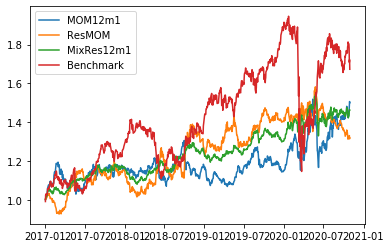

In [11]:
print('Janela de regressão de', base_resultados.index[0].strftime('%d/%m/%Y'),
      'até', base_resultados.index[-1].strftime('%d/%m/%Y'))
print(summary_col(models, stars = True, model_names = ['MOM12m1', 'ResMOM'] ))
print('Metricas de Performance:')
comparar_performances()

### Análise
**Regressões:**
- O portfólio de momentum 12m1 (*MOM12m1*) e o portfólio de momentum residual (*ResMOM*) apresentam market beta bem próximos, ambos relativamente baixos (o que é esperado de portfólios long-short).  

- *ResMOM* apresenta uma exposição negativa não trivial ao fator de risco de valor ($HML$), mostrando que no período analisado esta estratégia sobrepesou empresas com múltiplos de valor não atrativos.  

- O parâmetro entre *MOM12m1* e o fator de risco de momentum é próximo de $1$. Tal fato era esperado, uma vez que a regra de formação do *MOM12m1* é basicamente a mesma que a do $WML$, sendo a única diferença o universo de ações em cada regra de formação.  

- Curiosamente, *ResMOM* apresentou exposição à $WML$ estatisticamente significativa e **negativa** (apesar de próxima de 0), mostrando uma possível oportunidade de diversificação. 

**Métricas de Performance:**
-  Comparando *MOM12m1* e *ResMOM*, temos que, de forma geral, *MOM12m1* apresentou uma performance mais satisfatória levando o consideração o índice de Sharpe. No entanto, no que pesa o drawdown máximo, para alguns investidores a estratégia *ResMOM* pode ter sido mais atraente.
- Tanto *MOM12m1* quanto *ResMOM* apresentaram sharpe abaixo do benchmark, apesar de terem métricas de risco melhores.
- As métricas do portfólio *MixRes12m1* (formado como média entre *MOM12m1* e *ResMOM*), mostram que no período analisado a diversificação entre *ResMOM* e *MOM12m1* foi benéfica. O portfólio diversificado apresentou volatilidade bem abaixo das volatilidades dos portfólios subjacentes, além de apresentar menor drawdown máximo. Ainda, a queda da volatilidade foi grande o suficiente para o portfólio passar a apresentar Sharpe Ratio comparável ao do benchmark. Tal resultado justifica uma análise mais aprofundada dessa estratégia, com uma janela de tempo mais longa e maior universo de ativos.

## Código

### imports e preparação dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from statsmodels.formula.api import ols

In [2]:
# Fatores de Risco
factors = ['Market_Factor', 'SMB_Factor', 'HML_Factor', 'WML_Factor',
               'IML_Factor', 'Risk_Free'] 
url = 'http://nefin.com.br/Risk%20Factors/{}.xls'
dfs = {}

for factor in factors:
    dfs[factor] = pd.read_excel(url.format(factor))
    dfs[factor]['Date'] = pd.to_datetime(dfs[factor][['year', 'month', 'day']])
    dfs[factor] = dfs[factor].drop(columns=['year', 'month', 'day'])
    dfs[factor] = dfs[factor].set_index('Date')
    dfs[factor] = dfs[factor].iloc[:,0] # para transformar em pd.Series e conseguir usar pd.DataFrame.from_dict()

base_risk_factors = pd.DataFrame.from_dict(dfs)

# Acoes
tickers = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC4.SA',
           'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 
           'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 
           'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPFE3.SA', 'CRFB3.SA',
           'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA',
           'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 
           'ENGI11.SA', 'EQTL3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA',
           'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA',
           'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 
           'KLBN11.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA',
           'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PETR3.SA', 'PETR4.SA',
           'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 
           'SBSP3.SA', 'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMP3.SA',
           'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 
           'VVAR3.SA', 'WEGE3.SA', 'YDUQ3.SA']

# Baixando os dados do Yahoo
keys = []
for ticker in tickers:
    name = ticker[:-3]
    keys.append(name)

dfs = {}
for i in range(len(keys)):
    dfs[keys[i]] = web.DataReader(tickers[i], data_source='yahoo') 

# Consolidando os preços de fechamento em uma única base
base_fechamentos = []
for key in dfs.keys():
    base_fechamentos.append(dfs[key]['Close'])
base_fechamentos = pd.DataFrame(base_fechamentos).transpose()
base_fechamentos.columns = dfs.keys()
base_retorno = base_fechamentos.diff() / base_fechamentos.shift()

# Juntando
base_completa = base_retorno.merge(base_risk_factors, on = 'Date')

### base sinais MOM12m1

In [3]:
# Base Momentum
base_fechamentos_mensal = base_fechamentos.resample('MS').agg('last')
base_fechamentos_mensal
base_mom12m1 = (base_fechamentos_mensal.shift(2) - base_fechamentos_mensal.shift(13))/base_fechamentos_mensal.shift(13)

# datas_aux pega o primeiro dia de cada mês no indice de base_fechamentos
datas_aux = pd.DataFrame(base_fechamentos.index, index = base_fechamentos.index).resample('MS').agg('first')
base_mom12m1.index = datas_aux['Date']

### base sinais ResMOM

In [4]:
# datas_aux pega o primeiro dia de cada mês no indice de base_completa
datas_aux = pd.DataFrame(base_completa.index, index = base_completa.index).resample('MS').agg('first')
# base_resid_returns usa os dados da data_aux como índice para poder rodar o Loop a seguir
base_resid_returns = pd.DataFrame(index = datas_aux['Date'])


# No primeiro dia do mês t, rodar a regressao com 252 obs até o último dia do mês t-1. 
# Com isso, calcular os pesos para o portfólio do mês t.
for col in base_retorno.columns:
    residual_returns = []
    for date in base_resid_returns.index: 
        base_reg_aux = base_completa.loc[:,[col, 'Risk_Free', 'Market_Factor', 'SMB_Factor', 'HML_Factor', 'WML_Factor', 'IML_Factor']]
        base_reg_aux['Y'] = base_reg_aux.loc[:,col] - base_reg_aux['Risk_Free']
        base_reg_aux.dropna(inplace = True)
        
        if date not in base_reg_aux.index:
            residual_returns.append(None)
        else:  
            n = np.where(base_reg_aux.index==date)[0][0]
            if n >= 252:
                base_reg_aux['Y'] = base_reg_aux.loc[:,col] - base_reg_aux['Risk_Free']
                model = ols("Y ~ Market_Factor + SMB_Factor + HML_Factor", base_reg_aux.iloc[n-252:n]).fit()
                residual_return = np.mean(model.resid)/np.std(model.resid)
                residual_returns.append(residual_return)
            else:
                residual_returns.append(None)
    base_resid_returns[col] = residual_returns

# Tirando as datas com mais da metade de NaNs
base_resid_returns.dropna(axis = 0, thresh=len(base_resid_returns.columns)/2, inplace=True)

### formando os portfólios

In [5]:
base_res_long = []
base_res_short = []
base_mom_long = []
base_mom_short = []
for i in base_resid_returns.index:
    n_acoes = int(round(base_resid_returns.count(axis = 1)[i]/3))
    acoes_long = base_resid_returns.loc[i,:].dropna().sort_values(ascending  = False)[:n_acoes].index
    base_res_long.append(acoes_long)
    acoes_short = base_resid_returns.loc[i,:].dropna().sort_values(ascending  = True)[:n_acoes].index
    base_res_short.append(acoes_short)
    
    n_acoes = int(round(base_mom12m1.count(axis = 1)[i]/3))
    acoes_mom_long = base_mom12m1.loc[i,:].dropna().sort_values(ascending = False)[:n_acoes].index
    base_mom_long.append(acoes_mom_long)
    acoes_mom_short = base_mom12m1.loc[i,:].dropna().sort_values(ascending = True)[:n_acoes].index
    base_mom_short.append(acoes_mom_short)
    
base_res_long = pd.DataFrame(base_res_long, index  = base_resid_returns.index)
base_res_short = pd.DataFrame(base_res_short, index = base_resid_returns.index)
base_mom_long = pd.DataFrame(base_mom_long, index  = base_resid_returns.index)
base_mom_short = pd.DataFrame(base_mom_short, index = base_resid_returns.index)


### passando para frequência diária

In [6]:
# Base momento residual long
base_res_long_d = pd.DataFrame(base_res_long, index = base_completa.index).agg('ffill')
base_res_long_d = base_res_long_d[base_res_long.index[0]:]

# Base momento residual short
base_res_short_d = pd.DataFrame(base_res_short, index = base_completa.index).agg('ffill')
base_res_short_d = base_res_short_d[base_res_short.index[0]:]

# Base momento 12m1 long
base_mom_long_d = pd.DataFrame(base_mom_long, index = base_completa.index).agg('ffill')
base_mom_long_d = base_mom_long_d[base_mom_long.index[0]:]

# Base momento 12m1 short
base_mom_short_d = pd.DataFrame(base_mom_short, index = base_completa.index).agg('ffill')
base_mom_short_d = base_mom_short_d[base_mom_short.index[0]:]


### calculando os retornos

In [7]:
retornos_res_long = []
retornos_res_short = []
retornos_mom_long = []
retornos_mom_short = []
for d in base_res_long_d.index:
    
    acoes_long = base_res_long_d.loc[d,:].dropna()
    ret = base_completa.loc[d,acoes_long].sum()/len(acoes_long)
    retornos_res_long.append(ret)

    acoes_short = base_res_short_d.loc[d,:].dropna()
    ret = base_completa.loc[d, acoes_short].sum()/len(acoes_short)
    retornos_res_short.append(ret)
    
    acoes_long = base_mom_long_d.loc[d,:].dropna()
    ret = base_completa.loc[d,acoes_long].sum()/len(acoes_long)
    retornos_mom_long.append(ret)
    
    acoes_short = base_mom_short_d.loc[d,:].dropna()
    ret = base_completa.loc[d, acoes_short].sum()/len(acoes_short)
    retornos_mom_short.append(ret)


### consolidando os retornos em uma única base

In [8]:
base_resultados = pd.DataFrame({'long_res': retornos_res_long,
                                'short_res': retornos_res_short,
                                'long_mom': retornos_mom_long,
                                'short_mom': retornos_mom_short},
                                index = base_res_long_d.index)

base_resultados['ResMOM'] = base_resultados['long_res'] - base_resultados['short_res']
base_resultados['MOM12m1'] = base_resultados['long_mom'] - base_resultados['short_mom']
base_resultados['MixRes12m1'] = base_resultados['ResMOM']*0.5 + base_resultados['MOM12m1']*0.5
base_resultados = base_resultados.merge(base_risk_factors, on = 'Date')
base_resultados['Benchmark'] = base_resultados['Market_Factor'] + base_resultados['Risk_Free']

### regressões fatores

In [9]:
from statsmodels.iolib.summary2 import summary_col
models = []
for col in ['MOM12m1', 'ResMOM']:
    base_resultados['Y'] = base_resultados[col] - base_resultados['Risk_Free']
    model = ols("Y ~ Market_Factor + SMB_Factor + HML_Factor + WML_Factor + IML_Factor", data = base_resultados).fit()
    models.append(model)

### métricas de performance

In [10]:
def to_acum(serie):
    return (1+serie).cumprod()

def max_drawdown(series):
    series = list(series)
    drawdown = 0
    for i in range(len(series)):
        for j in range(i):
            d = (series[i] - series[j])/series[j]
            if d < drawdown:
                drawdown = d
    return abs(drawdown)

def comparar_performances():
    metrics_lists = []
    ports = ['MOM12m1', 'ResMOM', 'MixRes12m1', 'Benchmark']
    for k in ports:
        port = base_resultados[k]
        rf = base_resultados['Risk_Free']
        acum = to_acum(port)
        sharpe =  (np.mean(port)-np.mean(rf))/np.std(port)*np.sqrt(252)
        annualized_acum_return = (1 + (acum[-1]-acum[0])/acum[0])**(252/len(acum)) - 1
        annualized_mean_return = (1+np.mean(port))**(252) - 1
        annualized_std = np.std(port)*np.sqrt(252)
        max_d = max_drawdown(acum)
        metrics_lists.append([annualized_acum_return,
                              annualized_mean_return,
                              annualized_std,
                              sharpe,
                              max_d])      
        plt.plot(acum, label = k)
        
    metricas_consolidadas = pd.DataFrame(metrics_lists, 
                                         index = ports,
                                         columns=['Annualized Accumulated Return',
                                                  'Annualized Mean Return', 
                                                  'Annualized Std',
                                                  'Sharpe Ratio',
                                                  'Max Drawdown'] )

    plt.legend()
    display(metricas_consolidadas)

## Referências
 - Blitz, D., Huij, J., Martens, M., 2011. Residual momentum. Journal of Empirical Finance 18, 506–521.
 
 - Carhart, M. M. (1997). "On Persistence in Mutual Fund Performance". The Journal of Finance. 52 (1): 57–82.
 
 